## Librerías / Configuración

In [7]:
import math

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from pint import UnitRegistry

u = UnitRegistry()
u.setup_matplotlib(True)
u.load_definitions('./mis-defs.txt') 

## Definición de funciones: ley de decaimiento, actividad, etc

In [8]:
def nucleos_radiactivos(nuc_inicio, ti, tf, lmbd):
    """
Ley de decaimiento radiactivo.

:param nuc_inicio: es el número de nucleos radiactivos en el momento inicial
:param ti: es el tiempo de referencia, en el cual hay un número de nucleos igual a nuc_inicio 
:param tf: es el tiempo en el cual se calcula el número de nucleos actual 
:returns: el número de nucleos en el tiempo tf
"""
    return nuc_inicio * math.exp(-lmbd*(tf-ti))

def actividad(t_ref, act_ref, t, lmbd):
    delta_t = t-t_ref
    return act_ref * math.exp(-lmbd*delta_t)

def despejar_lmbd(ti, valor_inicial, tf, valor_final):
    # obtiene lambda a partir de pares de valor de tiempo y nucleos radiactivos / tiempo y actividad
    # por ejemplo: ti = 4, tf = 8, act_i = 852, act_f = 712 ===> lmbd = 
    return (1/(ti-tf))*math.log(valor_final/valor_inicial)

def obtener_semiperiodo(lmbd):
    return math.log(2)/lmbd

def obtener_lmbd(semiperiodo):
    return math.log(2)/semiperiodo

## Ejemplo

### Obtener el valor de la constante de decaimiento a partir de dos puntos de la tabla.

In [9]:
ti = 4 * u.hours
act_i = 852 * u.cpm

tf = 8 * u.hours
act_f = 712 * u.cpm

lmbd_a = despejar_lmbd(ti, act_i, tf, act_f)
lmbd_a

0.044877153854335 <Unit('1 / hour')>

### Obtener el valor de la constante de decaimiento a partir de **otros** dos puntos de la tabla.

In [10]:
ti = 30 * u.hours
act_i = 264 * u.cpm

tf = 8 * u.hours
act_f = 712 * u.cpm

lmbd_b = despejar_lmbd(ti, act_i, tf, act_f)
lmbd_b

0.045096764012075435 <Unit('1 / hour')>

### Calcular la actividad inicial de la muestra, y expresarla en Bq, Ci y CPM

In [11]:
t = 0 

t_ref = 8 * u.hours
act_ref = 712 * u.cpm

lmbd = (lmbd_a + lmbd_b)/2

a0 = actividad(t_ref, act_ref, t, lmbd)
a0.to('Bq'), a0.to('Ci'), a0.to('cpm')

(61225.44469589316 <Unit('Bq')>,
 1.654741748537653e-06 <Unit('curie')>,
 1020.424078264886 <Unit('cpm')>)

### Graficar la actividad y el número de nucleos en función del tiempo

#### Generación de un vector con los tiempos, y la referencia (t0) cambiada a t=4 horas.

In [12]:
tiempo = np.linspace(-4, 26, 31) * u('hours')
tiempo, tiempo.magnitude

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.,
        22., 23., 24., 25., 26.]) <Unit('hour')>,
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.,
        22., 23., 24., 25., 26.]))

#### Generación de un vector con igual cantidad de elementos que tiempo, pero todos ceros.

In [13]:
a = np.zeros_like(tiempo)
a


/home/diego/.pyenv/versions/3.6.0/envs/adq/lib/python3.6/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Cálculo de los elementos del vector actividad

In [19]:
act_inicial = 852 * u('cpm')
t_inicial = 0 * u('hours')
t = 11 * u('hours')
# lambda ya fue calculado antes, así que no la redefino

for n,t in enumerate(tiempo):
    print(n), print(t)
    a[n] = actividad(t_inicial, act_inicial, t, lmbd).magnitude
    
a

0
-4.0 hour
1
-3.0 hour
2
-2.0 hour
3
-1.0 hour
4
0.0 hour
5
1.0 hour
6
2.0 hour
7
3.0 hour
8
4.0 hour
9
5.0 hour
10
6.0 hour
11
7.0 hour
12
8.0 hour
13
9.0 hour
14
10.0 hour
15
11.0 hour
16
12.0 hour
17
13.0 hour
18
14.0 hour
19
15.0 hour
20
16.0 hour
21
17.0 hour
22
18.0 hour
23
19.0 hour
24
20.0 hour
25
21.0 hour
26
22.0 hour
27
23.0 hour
28
24.0 hour
29
25.0 hour
30
26.0 hour


array([1019.97598569,  975.10719021,  932.21217532,  891.20411431,
        852.        ,  814.52047667,  778.68967947,  744.43508087,
        711.6873438 ,  680.38018135,  650.45022257,  621.8368842 ,
        594.48224804,  568.33094371,  543.33003659,  519.42892065,
        496.57921602,  474.73467105,  453.85106872,  433.88613713,
        414.79946389,  396.55241438,  379.1080535 ,  362.43107095,
        346.4877097 ,  331.24569773,  316.67418264,  302.74366924,
        289.42595983,  276.69409714,  264.52230974])

#### Gráfica

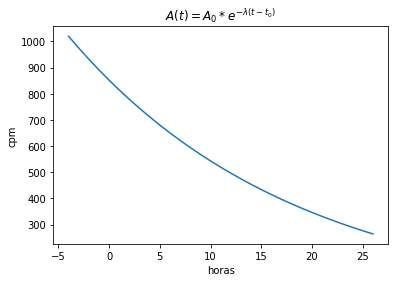

In [16]:
plt.plot(tiempo, a, label='actividad')

plt.xlabel('horas')
plt.ylabel('cpm')

plt.title("$A(t) = A_0 * e^{-\lambda (t-t_0)}$");